In [1]:
import numpy as np
import sklearn

import matplotlib.pyplot as plt

import umap.umap_ as umap

/home/cat/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)
(4, 14)


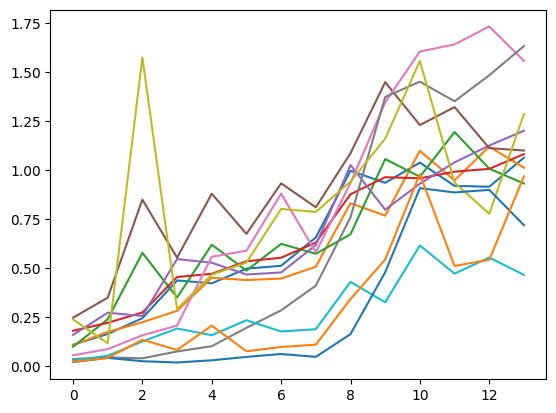

(48, 14)


In [7]:
# save root_dir
root_dir = '/home/cat/Downloads/npys/'

# names of behaviors which will be in the names of the files
names = ['distance',
         'exploration',
         'food',
         'water']

plt.figure()
#
data = []
for name in names:
    for k in range(2,5):
        fname_in = root_dir + name + '_c' + str(k) + '.npy'
        temp = np.load(fname_in)
        print (temp.shape)

        if name == 'food' or name =='water':
            temp = temp[:,::-1]

        #
        data.append(temp)

        # 
        plt.plot(np.mean(temp,axis=0))


plt.show()

data = np.vstack(data)

#
print (data.shape)


(48, 2)


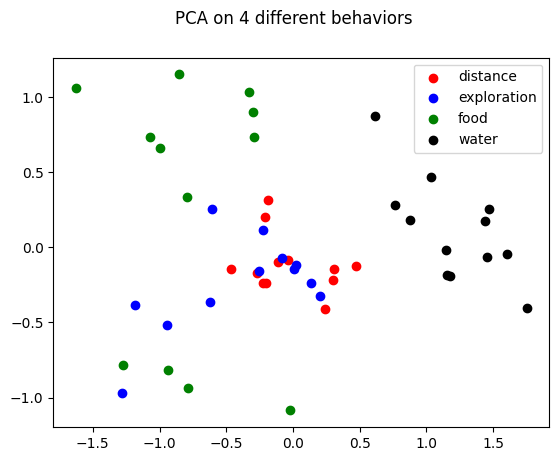

In [8]:

# run PCA on data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#
pca.fit(data)
data_pca = pca.transform(data)
print (data_pca.shape)

#
clrs = ['red','blue','green','black']
plt.figure()

# plot the data_pca in groups of 4
for k in range(0,data_pca.shape[0],12):
    plt.scatter(data_pca[k:k+12,0],
                data_pca[k:k+12,1],
                c=clrs[k//12],
                label = names[k//12])
    
plt.legend()


#
plt.suptitle("PCA on 4 different behaviors")

#
plt.show()

In [9]:
# Create a UMAP model and fit it to your data
print ("this can take up to 30seconds or so")
umap_model = umap.UMAP(n_neighbors=12, 
                       min_dist=0.1, 
                       n_components=2)  # You can adjust these parameters

#
umap_result = umap_model.fit_transform(data)


this can take up to 30seconds or so


<Figure size 640x480 with 0 Axes>

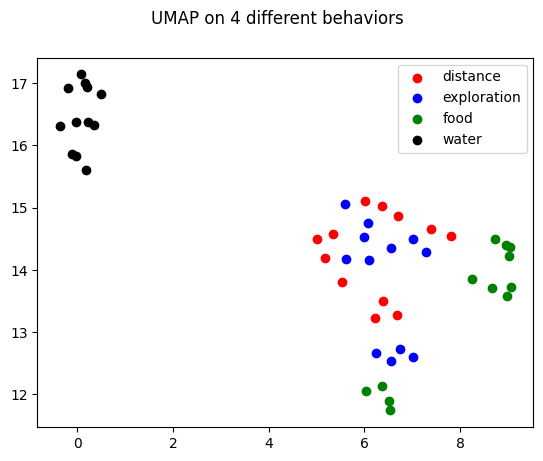

In [10]:

# Visualize the UMAP embedding
plt.figure()

#
plt.figure()
for k in range(0,umap_result.shape[0],12):
    plt.scatter(umap_result[k:k+12,0],
                umap_result[k:k+12,1],
                c=clrs[k//12],
                label = names[k//12])
    
plt.legend()

#
plt.suptitle("UMAP on 4 different behaviors")

#")

#
plt.show()